# Práctica 2: Procesamiento del Lenguaje Natural

__Fecha de entrega: 17 de abril de 2022__

El objetivo de esta práctica es aplicar los conceptos teóricos vistos en clase en el módulo de PLN. La práctica consta de 2 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

In [1]:
RANDOM_STATE = 42

# Apartado 1: Clasificador de noticias

__Número de grupo: 2__

__Nombres de los estudiantes: Enrique Rey Gisbert, Alberto Almagro Sánchez y Juan Carlos Llamas Núñez__

## 1) Carga del conjunto de datos

El fichero `BBC News.csv` contiene noticias clasificadas en 5 categorías diferentes. 

Carga los datos en un dataframe teniendo en cuenta que la columna `ArticleId` es un identificador de la noticia y por lo tanto no debes usarlo para clasificar. 

Estudia el tamaño del conjunto de datos y la proporción de noticias que pertenecen a cada una de las categorías. Indica si debemos tenerlo en cuenta de alguna forma al analizar los modelos que construyamos.

Muestra un mensaje cualquiera y explica si lo habrías clasificado en la clase correcta tras leerlo.

Crea una partición de los datos dejando el 80% para entrenamiento y el 20% restante para test usando la función `train_test_split` de sklearn. 

Empezamos cargando el dataframe con los datos del fichero BBC_News.csv

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('BBC News.csv')
df

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


Observamos que hay 1489 artículos, lo cual es una cantidad aceptable para poder entrenar un clasificador, incluso dividiendo los datos en un conjunto de entrenamiento del 80% y un conjunto de test del 20%. Por ejemplo, en el clasificador basado en Naive Bayes tendremos problemas si la cantidad muestras es demasiado pequeña, y necesaitaríamos aplicar técnicas de alisado que podemos evitar al tener una cantidad razonable de muestras. También, es importante notar que todos los artículos han sido extraidos de la misma fuente (BBC News) por lo que el texto de cada uno puede ser facilmente comparable sin grandes problemas relacionados con variaciones en la tipografía, idioma, espacios entre palabras o el tipo de texto utilizado en cada artículo.

In [4]:
df['Category'].value_counts() / df['Category'].count() * 100

sport            23.221477
business         22.550336
politics         18.389262
entertainment    18.322148
tech             17.516779
Name: Category, dtype: float64

En la tabla anterior vemos que tenemos una cantidad equilibrada de noticias de las 5 categorías, rondando el 20% en cada una. Esto será relevante a la hora de analizar el rendimiento de los clasificadores que construyamos porque, por ejemplo, en el caso del k-NN será decisivo tener una cantidad abundante de datos en relación al número de dimensiones. Si tuviesemos muchas categorías con pocos datos de cada una, o una proporción muy descompensada de datos en algunas categoría, tendríamos amplias regiones vacias del espacio multidimensional que afectarían al comportamiento del clasificador. Será importante además dividir el conjunto de datos en un conjunto de entrenamiento y otro de test de forma que haya también una proporción razonable de casuística en cada uno de los conjuntos para poder analizar los clasificadores de forma correcta.

Respecto a los modelos de bolsa de palabras y word-embeddings, también será imporante esta distribución equilibrada de datos de cada categoría. En bolsa de palabras, al tener suficientes datos de cada categoría podremos tener una amplia gama de palabras relacionadas con cada categoría, de forma que haya representación de palabras relevantes de cada una de las categorías en los vectores que construyamos. En word-embeddings, ocurrirá lo mismo pero con los conceptos que obtengamos. Será imporante tener vectores con información suficiente, poco dispersos y que con una cantidad razonable de datos puedan acumular conocimiento útil para poder comparar con nuevos datos de test.

Ahora, vamos a probar a acertar la categoría a la que pertenece un artículo en base a su texto, para lo cual elegimos un artículo cualquiera:

In [5]:
print(df.loc[654,'Text'])

strong dollar  call halts slide the us dollar s slide against the euro and yen has halted after us treasury secretary john snow said a strong dollar was  in america s interest .  but analysts said any gains are likely to be short-lived as problems with the us economy were still significant. they also pointed out that positive comments apart  president george w bush s administration had done little to stop the dollar s slide. a weak dollar helps boost exports and narrow the current account deficit. the dollar was trading at $1.2944 against the euro at 2100gmt  still close to the $1.3006 record level set on 10 november. against the japanese yen  it was trading at 105.28 yen  after hitting a seven-month low of 105.17 earlier in the day.  policy makers in europe have called the dollar s slide  brutal  and have blamed the strength of the euro for dampening economic growth. however  it is unclear whether ministers would issue a declaration aimed at curbing the euro s rise at a monthly meetin

Leyendo el texto obtenido, no está del todo claro si pertence a la categoría de politics o de business, puesto que encontramos palabras como 'ministers', 'policy' o 'officials' que parecen indicar que es de politics, pero la temática general y otras palabras como 'dollar', 'analysts' o 'growth' dan a entender que es de business. Esto pone de manifiesto que muchas veces es complicado clasificar este tipo de textos en las categorías dadas, y hay que hacer un análisis detallado para poder discernir entre unas y otras. La categoría del artículo con el texto anterior resulta ser business:

In [6]:
print(df.loc[654,'Category'])

business


Creamos por último una partición del conjunto de datos, dejando un 80% para entrenamiento y un 20% para test, utilizando la función train_test_split y barajándolos para ignorar posibles ordenamientos o patrones en los datos iniciales.

In [7]:
train, test = train_test_split(df, test_size=0.2, random_state=RANDOM_STATE, shuffle=True)
train, test

(      ArticleId                                               Text  \
 1166       1682  fuming robinson blasts officials england coach...   
 1106       1950  huge rush for jet airways shares indian airlin...   
 538         623  voters  don t trust politicians  eight out of ...   
 439        1431  dundee utd 4-1 aberdeen dundee united eased in...   
 1478       1144  visa row mandarin made sir john the top civil ...   
 ...         ...                                                ...   
 1130        193  blair  said he would stand down  tony blair pr...   
 1294        111  us trade gap hits record in 2004 the gap betwe...   
 860         833  tories pledge free sports lessons children wou...   
 1459       2206  dance music not dead says fatboy dj norman coo...   
 1126        759  greek pair attend drugs hearing greek sprinter...   
 
            Category  
 1166          sport  
 1106       business  
 538        politics  
 439           sport  
 1478       politics  
 ...    

In [8]:
train['Category'].value_counts() / train['Category'].count() * 100, test['Category'].value_counts() / test['Category'].count() * 100

(sport            23.741611
 business         21.895973
 entertainment    19.043624
 politics         18.288591
 tech             17.030201
 Name: Category, dtype: float64,
 business         25.167785
 sport            21.140940
 tech             19.463087
 politics         18.791946
 entertainment    15.436242
 Name: Category, dtype: float64)

## 2) Representación basada en bolsa de palabras y frecuencia de aparición

La primera vectorización que vamos a usar representará los mensajes usando el modelo de bolsa de palabras, monogramas y la frecuencia de aparición de cada palabra. Usa como _stop words_ las que vienen configuradas por defecto para el inglés.

Aplica la vectorización a los conjuntos de mensajes de entrenamiento y test. Muestra algún mensaje tanto en su formato de texto original como en la versión vectorizada. ¿Qué palabras se han eliminado y por qué?

Entrena un clasificador Naive Bayes Multinomial y calcula su tasa de aciertos sobre el conjunto de entrenamiento y el conjunto de test. A continuación calcula los valores de precisión, exhaustividad y puntuación F1 para cada una de las clases. Dibuja la matriz de confusión. Analiza los resultados obtenidos.

A continuación, entrena un clasificador k-NN con la configuración por defecto y usando la misma vectorización. Analiza los resultados, ¿a qué crees que se deben?

### Vectorización ###

En primer lugar vamos a aplicar la vectorización al conjunto de entrenamiento y al conjunto de test. Para ello, usamos `fit_transform` para el conjunto de entrenamiento,  para fijar el dicccionario en `CountVectorizer` mientras que usaremos simplemente el método `transform` en el conjunto de test (de forma que ambas herramientas usan lo aprendido en el conjunto de entrenamiento).

Obtenemos las frecuencias de las palabras con CountVectorizar y lo hacemos usando el diccionario que se inferirá de los términos de los documentos que se le pasan al CountVectorizer. Usamos también stop_words = 'english' como indica el enunciado.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

#El vocabulario será el inferido por el conjunto de test.
vectorizer = CountVectorizer(stop_words='english', binary=False)
train_n = train.loc[:,'Text'].to_numpy()
train_vector_data=vectorizer.fit_transform(train_n)

Podemos ver cómo han quedado los términos y cuántos términos hay utilizando la función get_feature_names() y mostrando train_vector_data una vez hecho el fit_transform con el conjunto de entrenamiento.

In [10]:
feature_names = vectorizer.get_feature_names()

print(len(feature_names))
print(feature_names[:5000])

22302
['00', '000', '0001', '000bn', '000m', '000th', '001', '001and', '001st', '0051', '007', '01', '0100', '0130', '028', '03', '033', '0400', '041', '04secs', '05', '050', '050505', '0530', '0530gmt', '056', '05bn', '05m', '06', '0630', '069', '07', '0700', '0710', '072', '0730', '08', '080', '0800', '0845', '0870', '088', '0900', '0950', '09secs', '10', '100', '1000m', '100bn', '100m', '100ml', '101', '102', '103', '104', '105', '105m', '106m', '107', '108', '1080', '109', '109m', '10bn', '10ft', '10m', '10secs', '10th', '11', '110', '1100', '110m', '110th', '111', '112', '113', '1130', '1130p', '113bn', '115', '116', '116i', '117', '117m', '118', '119', '119bn', '119m', '11bn', '11m', '11pm', '11th', '12', '120', '1200', '1200m', '120bn', '120gb', '120m', '121', '1230', '125', '125m', '126', '127th', '128', '129', '12a', '12bn', '12cm', '12m', '12th', '13', '130', '1300', '130m', '132', '133', '1330', '1337', '133m', '134', '135', '136', '137', '137m', '138m', '138p', '139', '13bn

In [11]:
print(train_vector_data)

  (0, 8691)	1
  (0, 17213)	5
  (0, 3028)	1
  (0, 14107)	1
  (0, 7349)	3
  (0, 4579)	1
  (0, 1799)	1
  (0, 17495)	2
  (0, 12136)	2
  (0, 6057)	1
  (0, 20610)	3
  (0, 19547)	1
  (0, 258)	1
  (0, 112)	1
  (0, 13630)	3
  (0, 12245)	1
  (0, 10940)	2
  (0, 6878)	1
  (0, 12608)	2
  (0, 5568)	4
  (0, 9461)	2
  (0, 7091)	1
  (0, 17403)	2
  (0, 14117)	1
  (0, 16493)	4
  :	:
  (1191, 21969)	1
  (1191, 16640)	1
  (1191, 10392)	1
  (1191, 1691)	1
  (1191, 5273)	1
  (1191, 2551)	1
  (1191, 19456)	1
  (1191, 4478)	1
  (1191, 3365)	2
  (1191, 16537)	1
  (1191, 15862)	1
  (1191, 10695)	1
  (1191, 10915)	1
  (1191, 16538)	1
  (1191, 21086)	1
  (1191, 10307)	1
  (1191, 15670)	1
  (1191, 14906)	1
  (1191, 9750)	2
  (1191, 15807)	1
  (1191, 22201)	1
  (1191, 14575)	2
  (1191, 20073)	1
  (1191, 21135)	1
  (1191, 19862)	1


Para ver qué términos se han extraído de cada noticia, utilizamos la función write_terms para poder mostrar el texto de una noticia y su versión vectorizada.

In [12]:
import numpy.ma as ma

def write_terms (feature_names, data, vector_data, index):
    '''
    Escribe los términos presentes en un mensaje representado como bolsa de palabras.
    
    - feature_names: terminos usados para vectorizar
    - data: lista de mensajes original (si data==None no se muestra el mensaje original)
    - vector_data: matriz (dispersa) de mensaje vectorizados
    - index: posición del mensaje a mostrar
    '''
    # máscara para seleccionar sólo el mensaje en posición index
    mask=vector_data[index,:]>0
    
    # términos que aparecen en ese mensaje vectorizado
    terminos = ma.array(feature_names, mask = ~(mask[0].toarray()))
    
    # mostrar mensaje original
    if data is not None:
        print('Mensaje', index, ':', data[index])
    
    # mostrar términos que aparecen en el mensaje vectorizado
    print('\n','Mensaje', index, 'vectorizado:', terminos.compressed(),'\n')

In [13]:
write_terms(feature_names, train_n, train_vector_data, 250)

Mensaje 250 : blair to face trust issue head on tony blair says he will be facing the issue of trust and his own integrity head on during the election campaign.  during a question and answer session with first-time voters on five news  mr blair said he had no option but to  confront it  by talking to people. he also dismissed claims government plans to get 50% of young people into university would devalue degrees. he was not  forcing  anyone to go to university  but places should be there for those who wanted them  he said. in answer to a question from 22-year-old liverpool student david dunne about concerns over the prime minister s personal integrity  mr blair said talking was the only answer.  you ve just got to confront it and say to people let s have a discussion on the things that worry you  the things that make you say  i can t trust you  or  i am against you on this.   the  worst thing in politics  was that the electorate only got  little snatches of policy  from things like pr

Analicemos que términos se han extraido y cuales se han seleccionado para el texto del artículo 250. En primer lugar, observamos algo de ruido, como por ejemplo términos numéricos, que pueden clasificarse bien, aunque no por las razones correctas. Si hubieramos usado únicamente las palabras de un diccionario, no tendriamos este problema, aunque esto por contra eliminaría muchas palabras que no estuvieran en el diccionario y que potencialmente pueden ser decisivas en el proceso de clasificación. En segundo lugar, notamos que se han extraido palabras muy comunes y con poca semántica (artículos, preposiciones...), como por ejemplo 'on', 'the' o 'to', gracias a que hemos utilizado stop_words = 'english'. Por último, si vamos una a una en este texto en particular, vemos de manera informal que casi la totalidad de las palabras que consideraríamos relevantes en el texto han sido seleccionadas, que es lo que queremos para poder hacer una clasificación adecuada.

Como último paso de la vectorización, para probar los clasificadores en el conjunto de test, transformamos también los mensajes en bolsas de palabras usando el `CountVectorizer` ajustado con el conjunto de entrenamiento. Usamos, como se mencionó anteriormente, solamente el transform en el conjunto de test (de forma que se usa lo aprendido en el conjunto de entrenamiento).

In [14]:
# Tomamos los textos del conjunto de test y los transformamos en una matriz
# de palabras. Al usar "transform" toma como referencia únicamente las palabras
# encontradas en el conjunto de entrenamiento
test_n = test.loc[:,'Text'].to_numpy()
test_vector_data=vectorizer.transform(test_n)
print(test_vector_data)

  (0, 112)	1
  (0, 612)	1
  (0, 723)	1
  (0, 887)	1
  (0, 1251)	1
  (0, 1402)	1
  (0, 1625)	2
  (0, 3118)	1
  (0, 3269)	2
  (0, 3868)	1
  (0, 3928)	1
  (0, 4029)	4
  (0, 4031)	1
  (0, 4063)	1
  (0, 4281)	1
  (0, 4417)	1
  (0, 4471)	1
  (0, 5105)	1
  (0, 5350)	1
  (0, 5374)	1
  (0, 5627)	1
  (0, 5628)	1
  (0, 5694)	1
  (0, 5765)	1
  (0, 6567)	1
  :	:
  (297, 17256)	2
  (297, 17257)	1
  (297, 17605)	1
  (297, 17758)	1
  (297, 18485)	1
  (297, 18553)	1
  (297, 18937)	3
  (297, 18988)	1
  (297, 19076)	3
  (297, 19085)	1
  (297, 19086)	3
  (297, 19123)	2
  (297, 19169)	1
  (297, 19315)	1
  (297, 19474)	1
  (297, 19557)	3
  (297, 19600)	2
  (297, 20144)	1
  (297, 20811)	2
  (297, 21326)	2
  (297, 21574)	1
  (297, 21941)	1
  (297, 22183)	1
  (297, 22274)	1
  (297, 22284)	1


### Naive Bayes Multinomial ###

Entrenamos ahora un clasificador Naive Bayes Multinomial, que se utiliza cuando las variables son enteras no negativas (como en nuestro caso, que es el número de apariciones de cada palabra en el documento). Una vez hecho esto, mostramos la tasa de aciertos sobre los conjuntos de entrenamiento y de test por separado. 

In [15]:
from sklearn.naive_bayes import MultinomialNB

mnb_classifier = MultinomialNB()

train_target = train.loc[:,'Category'].to_numpy()
test_target = test.loc[:,'Category'].to_numpy()
mnb_classifier.fit(train_vector_data, train_target)

mnb_train_predictions = mnb_classifier.predict(train_vector_data)
mnb_test_predictions = mnb_classifier.predict(test_vector_data)

print("Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(mnb_train_predictions == train_target))
print("Multinomial Naive Bayes, porcentaje de aciertos en test:", np.mean(mnb_test_predictions == test_target))

Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento: 0.9949664429530202
Multinomial Naive Bayes, porcentaje de aciertos en test: 0.9765100671140939


Como análisis inicial, la tasa de aciertos sobre el conjunto de entrenamiento es considerablemente alta (aunque siempre relativa a la importancia que tenga fallar en el uso que tenga el clasificador), de más del 99%, al igual que sobre el conjunto de test, que es superior al 97%. Por razones obvias y como ocurrirá también en los sucesivos clasificadores, los resultados son mejores para el conjunto de entrenamiento, pero en este caso comprobamos la eficacia de nuestro clasificador sobre todo por la alta tasa de aciertos en el conjunto de test y la poca degradación en los resultados del conjunto de test, que no fue usado para entrenar el clasificador (esto también es indicativo de que nuestro calsificador no ha sobreaprendido, y no se ha ajustado en exceso a los datos de entrenamiento, comportandose bien antes nuevos datos externos al proceso de entrenamiento).

Para hacer un análisis más detallado, calculemos algunos indicadores representativos de cada clase en base al conjunto de test.

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = mnb_test_predictions
print(classification_report(test_target, predictions))

               precision    recall  f1-score   support

     business       0.97      0.97      0.97        75
entertainment       1.00      1.00      1.00        46
     politics       0.95      0.95      0.95        56
        sport       0.98      1.00      0.99        63
         tech       0.98      0.97      0.97        58

     accuracy                           0.98       298
    macro avg       0.98      0.98      0.98       298
 weighted avg       0.98      0.98      0.98       298



También mostramos la matriz de confusión (en el eje Y representa la clase a la que pertenece y en el eje X mostramos la predicción)

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'business'),
  Text(1.5, 0, 'entertainment'),
  Text(2.5, 0, 'politics'),
  Text(3.5, 0, 'sport'),
  Text(4.5, 0, 'tech')])

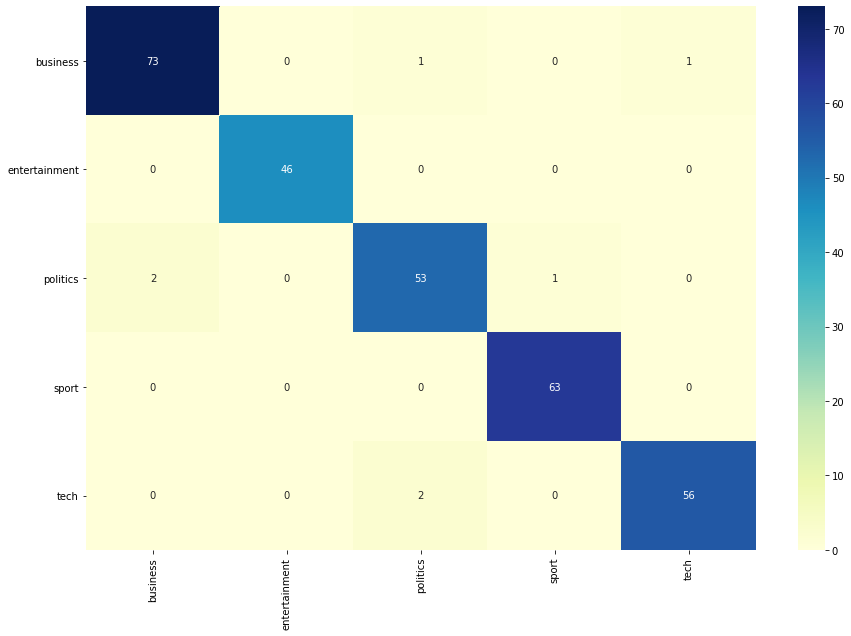

In [17]:
%matplotlib inline
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

target_names = ['business', 'entertainment', 'politics', 'sport', 'tech']
conf_matrix = confusion_matrix(test_target, predictions)
conf_matrix_df = pd.DataFrame(conf_matrix, index=target_names, columns=target_names)

plt.figure(figsize=(15, 10))
sn.heatmap(conf_matrix_df, annot=True, vmin=0, vmax=conf_matrix.max(), fmt='d', cmap="YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)

Analizando lo obtenido, los resultados son buenos en todas las categorías, con medidas de precisión, recall y f1-score altas. Como ya vimos en teoría, el clasificador Naive-Bayes Multinomial simplifica la realidad asumiendo que todas las variables utilizadas son independientes, pero obtiene resultados tan buenos o mejores que otros clasificadores más complejos. Destacan los valores obtenidos para la categoría de entertainment, que tiene precision y recall de 1. Esto quiere decir que siempre que el clasificador dice que un artículo es de entretenimiento, acierta, y además los recupera todos. Esto se refleja en la matriz de confusión en la segunda fila y la segunda columna con todo ceros en posiciones fuera de la diagonal principal. No debería de sorprender lo anterior, puesto que de forma similar a como le pasa a la categoría sport que tiene un recall de 1 y una precisón alta de 0.98, estas categorías tiene artículos que se diferencian de manera significativa con el resto de categorías y entre ellas mismas, y en cambio (al igual que pasará en posteriores clasificadores) las categorías de business, tech y politics se confunden más al tener palabras similares en muchos casos. En concreto, la que menos precisión y recall tiene es politics, que podemos ver en la matriz de confusión que el clasificador piensa a veces que sus artículos son de tecnología o de negocios. 

### Clasificador k-NN ###

Entrenamos también un clasificador K-NN con la configuración por defecto y usando la misma vectorización. De nuevo, mostramos la tasa de aciertos sobre los conjuntos de entrenamiento y de test por separado. 

In [18]:
from sklearn import neighbors

knn_classifier = neighbors.KNeighborsClassifier()
knn_classifier.fit(train_vector_data, train_target)

knn_train_predictions = knn_classifier.predict(train_vector_data)
knn_test_predictions = knn_classifier.predict(test_vector_data)

print("k-NN, porcentaje de aciertos en entrenamiento:", np.mean(knn_train_predictions == train_target))
print("k-NN, porcentaje de aciertos en test:", np.mean(knn_test_predictions == test_target))

k-NN, porcentaje de aciertos en entrenamiento: 0.7030201342281879
k-NN, porcentaje de aciertos en test: 0.5738255033557047


Al analizar los resultados, observamos una tasa de aciertos bastante más baja que con el clasificador Naive Bayes Multinomial anterior tanto en el conjunto de entrenamiento como en el conjunto de test, que es de menos del 60%. Además, se acentúa la degradación en el conjunto de test respecto al conjunto de entrenamiento. Esto nos sorprendió en un primer momento, pero con el análisis que vamos a realizar ahora entenderemos las razones por las que ha ocurrido esto. Con este fin, calculemos como antes algunos indicadores más representativos de cada clase y la matriz de confusión.

In [19]:
predictions_k = knn_test_predictions

print(classification_report(test_target, predictions_k))

               precision    recall  f1-score   support

     business       0.89      0.45      0.60        75
entertainment       0.69      0.39      0.50        46
     politics       0.93      0.77      0.84        56
        sport       0.36      1.00      0.53        63
         tech       0.93      0.22      0.36        58

     accuracy                           0.57       298
    macro avg       0.76      0.57      0.57       298
 weighted avg       0.76      0.57      0.57       298



(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'business'),
  Text(1.5, 0, 'entertainment'),
  Text(2.5, 0, 'politics'),
  Text(3.5, 0, 'sport'),
  Text(4.5, 0, 'tech')])

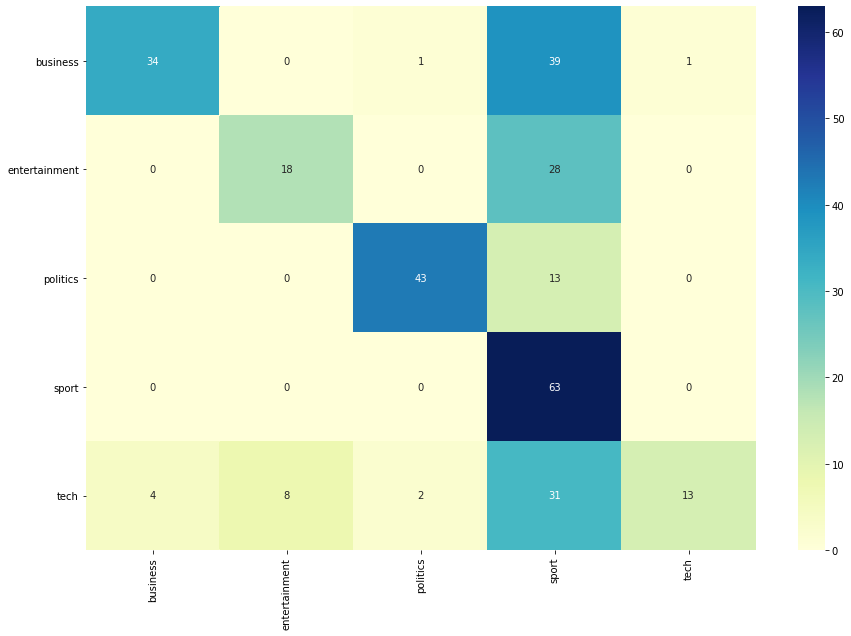

In [20]:
%matplotlib inline

conf_matrix = confusion_matrix(test_target, predictions_k)
conf_matrix_df = pd.DataFrame(conf_matrix, index=target_names, columns=target_names)

plt.figure(figsize=(15, 10))
sn.heatmap(conf_matrix_df, annot=True, vmin=0, vmax=conf_matrix.max(), fmt='d', cmap="YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)

Los resultados inferiores en k-NN respecto a Naive Bayes Multinomial (aparte de que Naive Bayes es un clasificador específico para este problema) y las variaciones tan grandes en los valores de precision y recall de las categorías se deben principalmente a algo que afecta de manera significativa al K-NN, la alta dimensionalidad, así como a la alta cantidad de variables irrelevantes. Con bolsas de palabras el número de variables es el número de palabras distintas (22302 en total), por lo que tenemos un espacio muy sobredimensionado, con pocos datos en comparación, que están en vectores muy dispersos en los que la distancia euclídea no nos es muy ventajosa.

Más concretamente, observamos que la categoría de sport es la que da peor precision, del 39%, pero con recall 1, lo que quiere decir que ha recuperado todos los artículos de deportes (se refleja en la matriz de confusión por la cuarta fila llena de ceros fuera de la diagonal principal) pero se ha equivocado diciendo que son de deportes un número muy elevado de artículos, como refleja la columna cuarta de la matriz de confusión. Esto se puede deber a que, ante la poca abundancia de datos respecto a la alta cantidad de dimensiones y a la cantidad de variables (palabras distintas) irrelevantes, clasifique artículos que no son de deportes como si lo fueran por el poco parecido que puede establecer con los artículos de su propia categoría y el mínimo parecido que encuentre con la categoría de deportes. En el caso de la categoría de tech, ocurre lo contrario. Tiene una precisión alta del 93%, por lo que no confunde tantos artículos de otras categorías diciendo que son de tecnología, pero tiene un recall del 22%, lo cual se debe al agujero negro que resulta ser la categoría de sport, pero también a una posible hetereogeneidad más alta entre los artículos de la propia categoría de tecnología o a la aparición de palabras que también están en otras categorías. En global, obtenemos un f1-score del 0.57, que a efectos prácticos es bastante pobre en comparación con otros clasificadores como el Naive Bayes anterior por los problemas comentados.

## 3) Representación basada en word-embeddings

La segunda vectorización que vamos a usar representará los mensajes usando word-embeddings. Cada documento se representará como el vector que resulta de promediar los embeddings de cada una de sus palabras. Al igual que en el apartado anterior, usaremos monogramas y las _stop words_ que vienen configuradas por defecto para el inglés. Recuerda usar como vocabulario para vectorizar el vocabulario del fichero con las word-embeddings. 

Entrena un clasificador Naive Bayes Gaussiano (el Multinomial no admite valores negativos que sí aparecen en los embeddings). Analiza el error por clase y dibuja la matriz de confusión.

Entrena otro clasificador kNN con la nueva vectorización y la configuración por defecto y analiza su error.

In [21]:
# !python -m pip install -U gensim
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

En primer lugar, construimos en modelo según lo indicado en el otro notebook y seleccionamos el vocabulario que vamos a utilizar para la vectorización. Este vocabulario serán todas las palabras que aparecen en las word-embeddings. Finalmente vectorizamos nuestros datos de entrenamiento, con las stop_words del inglés.

In [22]:
glove_file = 'glove.6B.50d.txt'
model = KeyedVectors.load_word2vec_format(glove_file, binary=False, no_header=True)

In [23]:
we_vocabulary = list(model.key_to_index.keys())
vectorizer_we = CountVectorizer(vocabulary = we_vocabulary, stop_words='english',binary = False)
X = vectorizer_we.fit_transform(train_n)

Podemos convencernos de que este proceso ha tenido éxito mostrando la siguiente información:

In [24]:
print(we_vocabulary[0:100],'\n')
print(X.toarray()[1][0:100],'\n')
print(train_n[1],'\n')

['the', ',', '.', 'of', 'to', 'and', 'in', 'a', '"', "'s", 'for', '-', 'that', 'on', 'is', 'was', 'said', 'with', 'he', 'as', 'it', 'by', 'at', '(', ')', 'from', 'his', "''", '``', 'an', 'be', 'has', 'are', 'have', 'but', 'were', 'not', 'this', 'who', 'they', 'had', 'i', 'which', 'will', 'their', ':', 'or', 'its', 'one', 'after', 'new', 'been', 'also', 'we', 'would', 'two', 'more', "'", 'first', 'about', 'up', 'when', 'year', 'there', 'all', '--', 'out', 'she', 'other', 'people', "n't", 'her', 'percent', 'than', 'over', 'into', 'last', 'some', 'government', 'time', '$', 'you', 'years', 'if', 'no', 'world', 'can', 'three', 'do', ';', 'president', 'only', 'state', 'million', 'could', 'us', 'most', '_', 'against', 'u.s.'] 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0] 

huge rush for jet airways shares indian airline jet airways  in

En primer lugar se muestran las primeras 100 palabras del vocabulario obtenido de las words-embeddings. Podemos observar que la primera de ellas es 'the', que como es una palabra vacía de significado en inglés, en la vectorización no aparece en ninguna de las filas (cada documento). Sin embargo, si podemos ver que en el documento que se muestra (el segundo) sí que aparece la palabra 'the'. También se puede ver que la decimoséptima palabra de la vectorización aparece 3 veces en el documento. En efecto, la palabra 'said' tiene tres apariciones en el documento 2.

A continuación creamos la vectorización de cada documento haciendo la media de los words embedings de cada palabra que aparece en el documento.

In [25]:
from scipy.sparse import find


def create_doc_embedding (doc_matrix_word_freq, keyedvectors):
    """
    create_doc_embedding creates a doc-embedding matrix where rows are the 
    documents and columns are the dimensions of the word-embedding. Each row r
    summarizes the vectors of the word-embeddings present in document r

    :param doc_matrix_word_freq: frequency matrix of the terms in each document
            It admits binary values, frequencies or weights.
            It admits the output of vectorizer.fit_transform
    :param keyedvectors: keyedvectors object from Gensim which has the 
            word-embedding information
    :return: returns the doc-embedding matrix that summarizes the 
             vector-embeddings of the words present in each document
    """ 

    
    num_docs, num_words= doc_matrix_word_freq.get_shape()

    # Creamos la matriz de documentos con tantas columnas como dimensiones tiene el we 
    doc_embed_matrix = np.zeros([num_docs,keyedvectors.vector_size])


    # Obtenemos los documentos
    docs, col, val = find(doc_matrix_word_freq)
    docs = np.unique(docs)

    # Para cada documento (esto se podrá hacer de forma más pythonica)
    for doc in docs:
      # Obtenemos las palabras presentes en el documento y su frecuencia
      row, words, frecs = find(doc_matrix_word_freq[doc,:])

      # Calculamos el vector medio para el documento
      # Para ello recuperamos los vectores del we presentes en el documento y 
      # los promediamos teniendo en cuenta su frecuencia
      count = 0
      for w,f in zip(words,frecs):
        doc_embed_matrix[doc,:] = doc_embed_matrix[doc,:] + (keyedvectors[w] * f)
        count = count +1
      doc_embed_matrix[doc,:] = doc_embed_matrix[doc,:]/count
    
      
    return doc_embed_matrix

In [26]:
doc_embed_matrix = create_doc_embedding(X,model)
# contiene un vector "embedding" para cada documento
doc_embed_matrix

array([[-0.17710999, -0.10985221, -0.00538421, ...,  0.01250536,
        -0.01725282,  0.13376784],
       [ 0.42361027, -0.08917098,  0.36363638, ...,  0.3342183 ,
         0.01909741,  0.11197112],
       [ 0.04145625,  0.13866377,  0.33800567, ...,  0.50406313,
         0.30238417,  0.12230255],
       ...,
       [ 0.06188008,  0.29719728,  0.11121852, ...,  0.35859004,
         0.05260968,  0.1458323 ],
       [ 0.06820433,  0.12915842, -0.14986465, ..., -0.24589185,
        -0.11094097,  0.16388838],
       [ 0.00684436,  0.12820043, -0.19054181, ...,  0.53155472,
         0.12937642, -0.47271475]])

Una vez ya tenemos la vectorización deseada para cada documento entrenamos el clasificador Naive Bayes Gaussiano e imprimimos la tasa de acierto del clasificador sobre el conjunto de entrenamiento y de test.

In [27]:
from sklearn.naive_bayes import GaussianNB
#Vectorizamos los datos del conjunto de test
query = vectorizer_we.transform(test_n)
#Y representamos cada documento (consulta) como la media de las words-embeddings de sus palabras
embed_query = create_doc_embedding(query,model)

#Entrenamos
gnb_classifier = GaussianNB()
gnb_classifier.fit(doc_embed_matrix, train_target)

gnb_train_predictions = gnb_classifier.predict(doc_embed_matrix)
gnb_test_predictions = gnb_classifier.predict(embed_query)

print("Gaussian Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(gnb_train_predictions == train_target))
print("Gaussian Naive Bayes, porcentaje de aciertos en test:", np.mean(gnb_test_predictions == test_target))

Gaussian Naive Bayes, porcentaje de aciertos en entrenamiento: 0.9404362416107382
Gaussian Naive Bayes, porcentaje de aciertos en test: 0.9362416107382551


En un primer análisis, se puede observar que esta tasa de aciertos es algo inferior a la que obtuvimos al trabajar con bolsas de palabras y el clasificador multinomial, aunque mucho mejor que bolsa de palabaras y k-NN. Para poder realizar un analisis más profundo vamos a mostrar algunos indicadores representativos para cada clase.

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

predictions_we = gnb_test_predictions
print(classification_report(test_target, predictions_we))

               precision    recall  f1-score   support

     business       0.93      0.95      0.94        75
entertainment       0.98      0.91      0.94        46
     politics       0.84      0.93      0.88        56
        sport       1.00      0.98      0.99        63
         tech       0.95      0.90      0.92        58

     accuracy                           0.94       298
    macro avg       0.94      0.93      0.94       298
 weighted avg       0.94      0.94      0.94       298



También mostramos la matriz de confusión (en el eje Y representa la clase a la que pertenece y en el eje X mostramos la predicción).

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'business'),
  Text(1.5, 0, 'entertainment'),
  Text(2.5, 0, 'politics'),
  Text(3.5, 0, 'sport'),
  Text(4.5, 0, 'tech')])

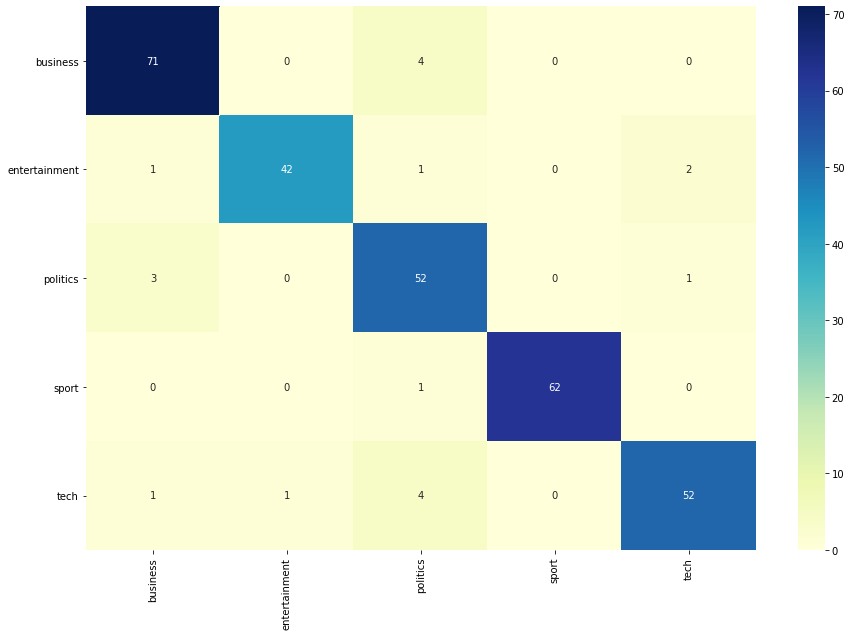

In [29]:
%matplotlib inline
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

conf_matrix_we = confusion_matrix(test_target, predictions_we)
conf_matrix_df_we = pd.DataFrame(conf_matrix_we, index=target_names, columns=target_names)

plt.figure(figsize=(15, 10))
sn.heatmap(conf_matrix_df_we, annot=True, vmin=0, vmax=conf_matrix_we.max(), fmt='d', cmap="YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)

Se puede ver que en la mayoría de las clases, la precisión es muy alta, destacando que en deportes la precisión es 1. Esto quiere decir que simpre que el predictor dice que un documento es de deportes, acierta. Esto se debe a que el clasificador consigue encontra rasgos distintivos en los documentos de deportes, ya que como el vocabulario es más específico, recogerá términos con una word-embedding similar. Además, el recall para deportes también es muy alto, luego no se confunde mucho con otras categorías. En el extremo opuesto tenemos la política, con la precisión más baja de todas. El clasificador dice que son de política algunos documentos de negocio y tecnología. Cabe destacar, que esta confusión es simétrica para la categoría de negocio pero no tanto para la de tecnología. Es decir, cuando el clasificador dice que un documento es de negocio, el número de fallos porque ese documento es en realidad de política es similar a a los fallos cuando dice que es de política pero en realidad es de negocio (aunque el porcentaje es mayor para cuando el predictor dice política). Sin embargo, cuando clasifica un documento como de tecnología casi nunca es realmente de política. En cuanto al recall la categoría de tecnología es la que menos documentos recupera en porcentaje. Esto contrasta un poco con los resultados obtenidos para el calsificador multinomial, donde la categoría tecnología tenía un recall de 0.97. En general podemos afirmar que los resultados son razonablemente buenos ya que la mayor confusión se encuentra entre las categorías de negocio y política, que muchas veces tratan temas comunes y por tanto, es lógico que el vocabulario utilizado sea similar. Más aún cuando utilizamos word-embeddings cuyas dimensiones tienen más que ver con conceptos, que pueden diluir algo la instancia concreta de uso de cada término.

Es interesante graficar la distribución de los variables para ver si realmente siguen una normal.

<AxesSubplot:ylabel='Density'>

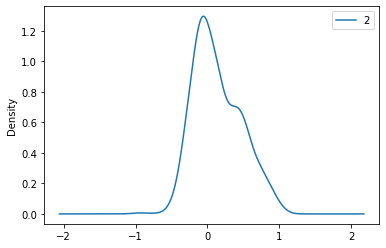

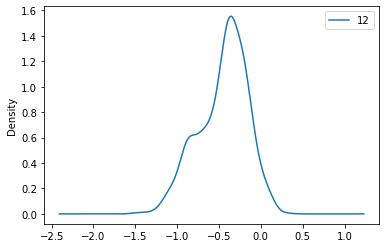

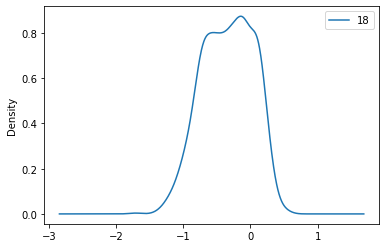

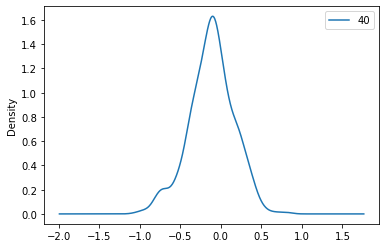

In [30]:
import pandas as pd

#for i in range(0,10):
#    for j in range(0,5):
#        term=pd.DataFrame(data= doc_embed_matrix[(5*i+j):(5*(i+1)),:])
#        term.plot.density()
term=pd.DataFrame(data= doc_embed_matrix[:,2],columns=list([2]))
term.plot.density()
term=pd.DataFrame(data= doc_embed_matrix[:,12],columns=list([12]))
term.plot.density()
term=pd.DataFrame(data= doc_embed_matrix[:,18],columns=list([18]))
term.plot.density()
term=pd.DataFrame(data= doc_embed_matrix[:,40],columns=list([40]))
term.plot.density()

Vemos que, para algunas variables (en concreto 2,12,18,40), la distribución no es una normal sino que tiene notables asimetrías y esto puede estar causando problemas en el clasificador.

### Clasificador k-NN ###

Pasamos ahora a entrenar un k-NN, al que le pasamos la vectorización de documentos como embeddings.

In [31]:
from sklearn import neighbors

knn_classifier_we = neighbors.KNeighborsClassifier()
knn_classifier_we.fit(doc_embed_matrix, train_target)

knn_train_predictions_we = knn_classifier_we.predict(doc_embed_matrix)
knn_test_predictions_we = knn_classifier_we.predict(embed_query)

print("k-NN, porcentaje de aciertos en entrenamiento:", np.mean(knn_train_predictions_we == train_target))
print("k-NN, porcentaje de aciertos en test:", np.mean(knn_test_predictions_we == test_target))

k-NN, porcentaje de aciertos en entrenamiento: 0.9731543624161074
k-NN, porcentaje de aciertos en test: 0.9630872483221476


En contraposición con lo que pasaba con el caso de la bolsa de palabras, el resultado es mucho mejor. Esto nos ha sorprendido inicialmente porque esperabamos un comportamiento malo, similar al de la bolsa de palabras. Sin embargo hay una diferencia fundamental entre este caso y el anterior: la dimensión. Mientras que en el clasificador de k-NN con bolsas de palabras el número de variables era cada una de las palabras (22302 en total), en esta ocasión solamente tenemos 50 variables (el número de columnas de doc_embed_matrix, es decir, el número de "conceptos"). Como el k-NN sufre la maldición de la dimensionalidad, cuanto menor sea el número de variables, mejor funcionará. Además, que el k-NN trabaje con la distancia euclidea es más ventajoso en este caso que en el anterior porque, mientras que en el anterior los vectores eran muy dispersos, en este no lo son, tienen valores continuos y hemos visto en los ejemplos que tiene más sentido calcular diferencias entre estos vectores. Como la distancia euclídea no es más que la norma de la diferencia de los vectores, es razonable que funcione bien.

Para un análisis más fino del error, calculamos la precision y recall por clases y dibujamos la matriz de confusión

In [32]:
predictions_we_k = knn_test_predictions_we

print(classification_report(test_target, predictions_we_k))

               precision    recall  f1-score   support

     business       0.93      0.95      0.94        75
entertainment       0.98      0.96      0.97        46
     politics       0.93      0.91      0.92        56
        sport       1.00      1.00      1.00        63
         tech       0.98      1.00      0.99        58

     accuracy                           0.96       298
    macro avg       0.96      0.96      0.96       298
 weighted avg       0.96      0.96      0.96       298



(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'business'),
  Text(1.5, 0, 'entertainment'),
  Text(2.5, 0, 'politics'),
  Text(3.5, 0, 'sport'),
  Text(4.5, 0, 'tech')])

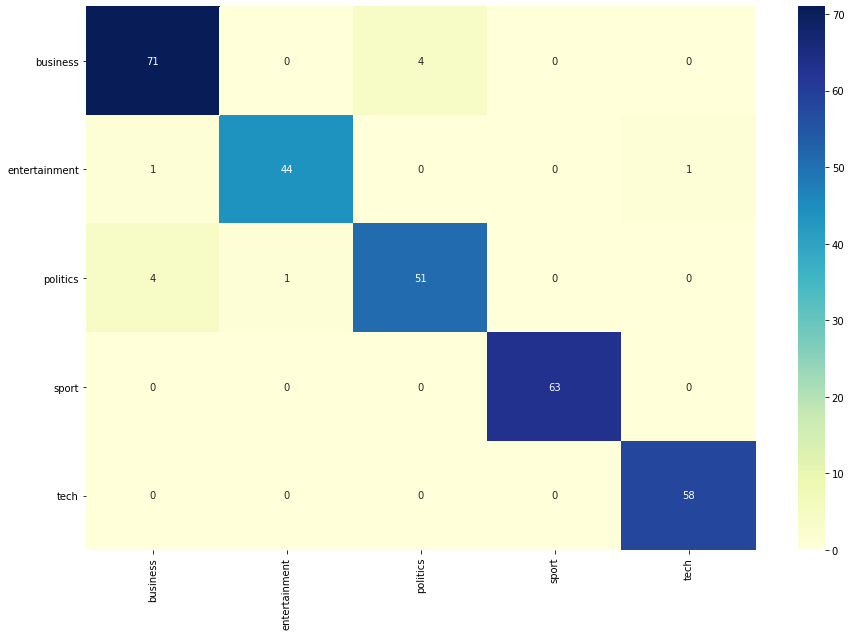

In [33]:
%matplotlib inline

conf_matrix_we = confusion_matrix(test_target, predictions_we_k)
conf_matrix_df_we = pd.DataFrame(conf_matrix_we, index=target_names, columns=target_names)

plt.figure(figsize=(15, 10))
sn.heatmap(conf_matrix_df_we, annot=True, vmin=0, vmax=conf_matrix_we.max(), fmt='d', cmap="YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)

A simple vista se puede apreciar que el comportamiento es bastante bueno, comparable a los resultados que ofrece Naive Bayes que es un clasificador más específico para este problema. Quizás lo más llamativo es que tanto el recall como la precision de la categoría de deportes es 1, luego el clasificador discrimina perfectamente que documentos son y que documentos no son de deporte. Por otro lado, se mantiene cierta confusión simétrica entre las cotegorías de negocio y política que ya habíamos visto en el clasificador Naive Bayes Gaussiano.

## 4) Análisis comparativo final

Hemos entrenado dos clasificadores usando dos vectorizaciones diferentes de los datos. Compara la tasa de acierto de todos ellos y explica a qué crees que se deben las diferencias.

Busca un mensaje mal clasificado por el Naive Bayes con vectorización de frecuencias y otro mal clasificado por el k-NN con Word-embeddings. Analiza los vectores de términos de dichos mensajes e intenta razonar por qué ha sido clasificado erróneamente.

Para el Naive Bayes con vectorización de frecuencias, elige dos clases donde el clasificador no haya funcionado bien y analiza las palabras más relevantes para clasificar una noticia como de dichas clases. Razona si lo que ves crees que influye en la posible confusión a la hora de clasificar entre dichas clases.

### Comparación

Vamos a imprimir otra vez los resultados de cada uno de los clasificadores:

In [34]:
print('Naive Bayes con vectorización de frecuencias:\n',classification_report(test_target, predictions))
print('\nk-NN con vectorización de frecuencias:\n',classification_report(test_target, predictions_k))
print('\nNaive Bayes con Word-embeddings:\n',classification_report(test_target, predictions_we))
print('\nk-NN con Word-embeddings:\n',classification_report(test_target, predictions_we_k))

Naive Bayes con vectorización de frecuencias:
                precision    recall  f1-score   support

     business       0.97      0.97      0.97        75
entertainment       1.00      1.00      1.00        46
     politics       0.95      0.95      0.95        56
        sport       0.98      1.00      0.99        63
         tech       0.98      0.97      0.97        58

     accuracy                           0.98       298
    macro avg       0.98      0.98      0.98       298
 weighted avg       0.98      0.98      0.98       298


k-NN con vectorización de frecuencias:
                precision    recall  f1-score   support

     business       0.89      0.45      0.60        75
entertainment       0.69      0.39      0.50        46
     politics       0.93      0.77      0.84        56
        sport       0.36      1.00      0.53        63
         tech       0.93      0.22      0.36        58

     accuracy                           0.57       298
    macro avg       0.76   

Lo primero que podemos ver es el orden de acierto de los clasificadores:

- El clasificador que ha obtenido mejores resultados ha sido el Naive Bayes con vectorización de frecuencias, con un 98% de aciertos.
- En segundo lugar estaría el clasificador k-NN basado en Word-embeddings, con un 96% de acierto.
- La medalla de bronce se la lleva el Naive Bayes con Word-embeddings, cuya tasa de acierto ronda el 94%.
- Finalmente, el peor de todos los clasificadores con diferencia ha resultado ser el k-NN con vectorización de frecuencias, con un 76% de acierto.

Esta última posición tiene sentido para el k-NN con vectorización de frecuencias. Como ya comentamos en la sección correspondiente, el número de variables que el clasificador ha de tener en cuenta para clasificar noticias es de 22302, muy superior a las 50 para el clasificador k-NN con Word-embeddings. Además, no es ese el único problema, ya que si miramos las palabras más comunes de cada categoría (más abajo se hace para las secciones de 'business' y 'politics', encontramos palabras tan comunes en toda clase de contextos que no permiten distinguir las categorías. Ejemplos de estas palabras son 'said', 'mr', 'new', 'year' o 'told', que son ciertamente irrelevantes a la hora de clasificar una noticia.

En contraposición, el Naive Bayes consigue distinguir casi a la totalidad todas las noticias, siendo las precisiones más bajas la de las categorías 'business' y 'politics', que como ya hemos repetido, muchas veces tratan temas comunes y son por tanto las más propensas a error desde un punto de vista lógico. Es por esto que también los otros dos mejores clasificadores se equivocan más entre las dos categorías.

Finalmente, vamos a comparar el Naive Bayes basado en Word-embeddings con los demás. Ya hemos comentado cómo el que algunas variables no sigan una distribución normal puede estar afectándole, al no poder usar un clasificador Naive Bayes Multinomial (como hacíamos con la bolsa de palabras, donde las variables tomaban valores discretos) y tener que haber cambiado a un Naive Bayes Gaussiano. Sin embargo, también se obtienen peores resultados en todas las categorías a excepción del recall en la categoría de política (con una diferencia de una única noticia).

Podemos concluir pues que para este problema particular ha resultado óptima la estrategia más simple.

Puede ser interesante ver si hay algunas noticias donde se hayan equivocado todos los clasificadores (omitimos el k-NN con vectorización de frecuencias debido a sus malos resultados).

In [46]:
i = 0
error_mnb = []
while(i < len(mnb_test_predictions)):
    pred = mnb_test_predictions[i]
    real = test_target[i]
    if pred != real:
        error_mnb.append((i, pred, real))
    i = i+1
    
# No consideramos el clasificador k-NN con vectorización de frecuencias

#i = 0
#error_knn = []
#while(i < len(knn_test_predictions)):
#    pred = knn_test_predictions[i]
#    real = test_target[i]
#    if pred != real:
#        error_knn.append((i, pred, real))
#    i = i+1
    
i = 0
error_gnb = []
while(i < len(gnb_test_predictions)):
    pred = gnb_test_predictions[i]
    real = test_target[i]
    if pred != real:
        error_gnb.append((i, pred, real))
    i = i+1
    
i = 0
error_knn_we = []
while(i < len(knn_test_predictions_we)):
    pred = knn_test_predictions_we[i]
    real = test_target[i]
    if pred != real:
        error_knn_we.append((i, pred, real))
    i = i+1

common_error = [w for w in error_mnb if w in error_gnb and w in error_knn_we]
print('Las noticias donde se han equivocado todos los clasificadores son:\n',np.array(common_error))

Las noticias donde se han equivocado todos los clasificadores son:
 [['149' 'business' 'politics']
 ['294' 'politics' 'business']]


Al parecer, tanto los Naive Bayes como el k-NN basado en Word-embeddings consideran que las noticias 149 y 294 del conjunto de test pertenecen a otra categoría. En la sección final mostramos estas noticias y analizamos la segunda (la primera es mucho más extensa). Como era de esperar, estas noticias tratan temas relacionados tanto con negocios como con política, siendo la 149 sobre el salario mínimo (estando clasificada como de política) y la 294 sobre la contratación de mujeres en el ministerio de asuntos exteriores de Arabia Saudí (estando clasificada como de negocios). Ambos son temas que están en la frontera entre las dos categorías.

### Análisis de errores

#### Clasificador Naive Bayes con vectorización de frecuencias

In [36]:
import random
# Mensaje mal clasificado por Naive Bayes con vectorización de frecuencias

random.seed(RANDOM_STATE)
i = random.randint(0, len(mnb_test_predictions) - 1)

while(mnb_test_predictions[i] == test_target[i]):
    i = random.randint(0, len(mnb_test_predictions) - 1)
print("Una noticia mal clasificada por el Naive Bayes con vectorización de frecuencias es la " + str(i) + ".\n")
print("El clasificador dijo que era de la categoría "+mnb_test_predictions[i]+" y en realidad era de "+test_target[i]+".\n")
write_terms(feature_names, test_n, test_vector_data, i)

Una noticia mal clasificada por el Naive Bayes con vectorización de frecuencias es la 3.

El clasificador dijo que era de la categoría politics y en realidad era de tech.

Mensaje 3 : online commons to spark debate online communities set up by the uk government could encourage public debate and build trust  says the institute of public policy research (ippr).  existing services such as ebay could provide a good blueprint for such services  says the think-tank. although the net is becoming part of local and central government  its potential has not yet been fully exploited to create an online  commons  for public debate. in its report  is online community a policy tool   the ippr also asks if id cards could help create safer online communities. adopting an ebay-type model would let communities create their own markets for skills and services and help foster a sense of local identity and connection.  what we are proposing is a civic commons   will davies  senior research fellow at the ip

A la vista de la vectorización de términos del mensaje, podemos encontrar muchos términos que parecen más propios de textos de la categoría de política que de tecnología, como podrían ser 'government', 'legislation', 'politics', 'democracy', 'cooperation', 'citizens', 'nationally', 'diversity' o 'proposals'. Si bien es cierto que otras muchas de las palabras son propias de textos tecnológicos (multitud de palabras haciendo referencia al mundo digital, como 'web', 'online' o 'weblogs'), estas no son tan abundantes, siendo la mayoría de las palabras neutras, frecuentes en varios tipos de textos.

Resaltamos que es probable que una de las principales causas de la confusión del clasificador sea la palabra 'democracy'. Si nos vamos al texto original, esta palabra aparece en la frase:

'the idea of a  civic commons  was originally proposed by stephen coleman  professor of e-democracy at the oxford internet institute'

De forma que el vectorizador ha quitado la 'e-' que en este caso aporta bastante significado a la frase, ya que la 'e-democracy' o democracia digital es un término puramente de textos tecnológicos, en comparación a 'democracy', que se encuentra casi en exclusiva en noticias políticas.

#### Clasificador k-NN con Word-embeddings

Utilizaremos una función parecida a la write_terms para el caso del word-embeddings.

In [37]:
import numpy.ma as ma

def write_terms_we (feature_names, data, vector_data, index):
    '''
    Escribe los términos presentes en un mensaje representado como bolsa de palabras.
    
    - feature_names: terminos usados para vectorizar
    - data: lista de mensajes original (si data==None no se muestra el mensaje original)
    - vector_data: matriz (dispersa) de mensaje vectorizados
    - index: posición del mensaje a mostrar
    '''
    terminos = []
    msg = vector_data[index]
    for i in range(0,len(feature_names)):
        if msg[i] > 0:
            terminos.append(feature_names[i])
            
    terminos = sorted(terminos)
    
    # mostrar mensaje original
    if data is not None:
        print('Mensaje', index, ':', data[index])
    
    # mostrar términos que aparecen en el mensaje vectorizado
    print('\n','Mensaje', index, 'vectorizado:', terminos,'\n')

In [38]:
import random
# Mensaje mal clasificado por k-NN con Word-embeddings

random.seed(RANDOM_STATE)
i = random.randint(0, len(knn_test_predictions_we) - 1)

while(knn_test_predictions_we[i] == test_target[i]):
    i = random.randint(0, len(knn_test_predictions_we) - 1)
print("Una noticia mal clasificada por el k-NN con Word-embeddings es la " + str(i) + ".\n")
print("El clasificador dijo que era de la categoría "+knn_test_predictions_we[i]+" y en realidad era de "+test_target[i]+".\n")
write_terms_we(we_vocabulary, test_n, query.toarray(), i)

Una noticia mal clasificada por el k-NN con Word-embeddings es la 12.

El clasificador dijo que era de la categoría politics y en realidad era de business.

Mensaje 12 : russia wto talks  make progress  talks on russia s proposed membership of the world trade organisation (wto) have been  making good progress  say those behind the negotiations.  but the chairman of the working party  ambassador stefan johannesson of iceland  warned that there was  still a lot of work has to be done . his comments came as president george w bush said the us backed russian entry. but he said for russia to make progress the government must  renew a commitment to democracy and the rule of law . his comments come three days before he is due to meet president vladimir putin.  russia has been waiting for a decade to join the wto and hopes to finally become a member by early 2006. a decision could be reached in december  when the wto s 148 current members gather for a summit in hong kong. that would allow an e

Esta noticia trata de cómo Rusia quería formar parte de la WTO (World Trade Organization) en 2005. Si bien es un artículo de la categoría 'business', es cierto que se centra mucho en la situación internacional de Rusia, hablando también de la opinión del presidente de Estados Unidos George Bush. Por tanto, es normal que en la vectorización del mensaje encontremos muchas palabras como 'putin', 'bush', 'ambassador', 'government', 'meeting', 'democracy', 'russia' o 'multilateral', mucho más propias de textos políticos que de textos financieros o de negocios. Por tanto, consideramos que, en este caso, es comprensible la confusión del clasificador, ya que aunque hay términos como 'businesses', 'ownership' o 'insurance', que podrían dar pistas de que no se trata de una noticia política (aunque son términos que técnicamente podrían aparecer en noticias políticas), hay muchas otras palabras que llevan a error. Esto provocará que el word-embeddings le asigne a la noticia una relación muy alta con conceptos puramente políticos y por tanto justifica el error. Como ya comentamos, este clasificador tiene más confusiones entre noticias de las categorías de política y de negocios.

#### Confusión entre clases del Naive Bayes con vectorización de frecuencias

Para la última parte, se nos pide tomar dos clases del Naive Bayes con vectorización de frecuencias que no hayan funcionado demasiado bien. Sin embargo, el Naive Bayes que hemos entrenado funciona muy bien, con una precisión media del 98%. Tomaremos las clases business y politics debido a que son las únicas en las que ha habido malas clasificaciones en ambos sentidos.

Veamos qué palabras son las más usadas en cada una de las categorías.

In [39]:
SIZE = 20

frecuencias_totales = train['Category'].value_counts()

In [40]:
from scipy.sparse import csr_matrix
from operator import itemgetter

terminos = np.zeros(len(feature_names))

print("Hay un total de", frecuencias_totales['business'], "noticias de business.\n")

for i in range(0,len(mnb_train_predictions)):
    if mnb_train_predictions[i] == 'business':
            msg=train_vector_data[i,:]
            csr = csr_matrix(msg).toarray()
            terminos = terminos + (csr[0] > 0)

frecuencias_business = []

for i in range(0,len(terminos)):
    frecuencias_business.append([int(terminos[i] / frecuencias_totales['business'] * 1000) / 10,feature_names[i]])
    
frecuencias_business = sorted(frecuencias_business, key=itemgetter(0), reverse=True)

print("Palabras más comunes encontradas en noticias de la categoría business:")
frecuencias_business[0:SIZE]

Hay un total de 261 noticias de business.

Palabras más comunes encontradas en noticias de la categoría business:


[[92.3, 'said'],
 [62.4, 'year'],
 [46.3, 'new'],
 [40.2, 'company'],
 [40.2, 'firm'],
 [40.2, 'mr'],
 [39.0, 'market'],
 [34.0, '2004'],
 [33.7, 'chief'],
 [33.3, 'years'],
 [32.1, 'growth'],
 [31.0, 'government'],
 [29.5, 'world'],
 [28.3, 'business'],
 [27.9, 'analysts'],
 [27.9, 'financial'],
 [27.5, 'economy'],
 [27.5, 'shares'],
 [26.8, '000'],
 [26.8, 'biggest']]

In [41]:
from scipy.sparse import csr_matrix
from operator import itemgetter

terminos = np.zeros(len(feature_names))

print("Hay un total de", frecuencias_totales['politics'], "noticias de politics.\n")

for i in range(0,len(mnb_train_predictions)):
    if mnb_train_predictions[i] == 'politics':
            msg=train_vector_data[i,:]
            csr = csr_matrix(msg).toarray()
            terminos = terminos + (csr[0] > 0)

frecuencias_politics = []

for i in range(0,len(terminos)):
    frecuencias_politics.append([int(terminos[i] / frecuencias_totales['politics'] * 1000) / 10,feature_names[i]])
    
frecuencias_politics = sorted(frecuencias_politics, key=itemgetter(0), reverse=True)

print("Palabras más comunes encontradas en noticias de la categoría politics:")
frecuencias_politics[0:SIZE]

Hay un total de 218 noticias de politics.

Palabras más comunes encontradas en noticias de la categoría politics:


[[91.7, 'said'],
 [77.0, 'mr'],
 [69.7, 'government'],
 [54.1, 'people'],
 [52.7, 'minister'],
 [48.1, 'labour'],
 [44.9, 'election'],
 [43.1, 'blair'],
 [43.1, 'party'],
 [42.6, 'told'],
 [42.2, 'new'],
 [41.7, 'uk'],
 [39.9, 'tony'],
 [38.0, 'public'],
 [38.0, 'say'],
 [37.6, 'leader'],
 [36.6, 'prime'],
 [36.2, 'general'],
 [36.2, 'secretary'],
 [36.2, 'year']]

Como podemos ver, además de alguna palabra muy común como 'said', que aparece en toda clase de contextos y por lo tanto es probable que el clasificador no la tenga muy en cuenta, observamos que entre las palabras más comunes de las noticias de ambas categorías se encuentran muchos términos más específicos. Es el caso de 'company', 'growth', 'market' o 'analysts' para el caso de noticias de la categoría business y el de 'minister', 'leader', 'party' (en referencia al partido político) o 'secretary', términos mucho más habituales en temas políticos.

En principio, la mayoría de las palabras son bastante diferentes y el clasificador debería ser capaz de distinguir entre ambas categorías sin demasiada dificultad. Vamos a analizar sin embargo los escasos ejemplos en los que esto no es así.

In [42]:
i = 0
while(i < len(mnb_test_predictions)):
    pred = mnb_test_predictions[i]
    real = test_target[i]
    if (pred == 'politics' and real == 'business') or (pred == 'business' and real == 'politics'):
        print("Una noticia mal clasificada por el Naive Bayes con vectorización de frecuencias es la " + str(i) + ".")
        print("El clasificador dijo que era de la categoría " + pred + " y en realidad era de " + real + ".\n")
    i = i+1;

Una noticia mal clasificada por el Naive Bayes con vectorización de frecuencias es la 91.
El clasificador dijo que era de la categoría business y en realidad era de politics.

Una noticia mal clasificada por el Naive Bayes con vectorización de frecuencias es la 149.
El clasificador dijo que era de la categoría business y en realidad era de politics.

Una noticia mal clasificada por el Naive Bayes con vectorización de frecuencias es la 294.
El clasificador dijo que era de la categoría politics y en realidad era de business.



Veamos esas noticias.

In [43]:
write_terms(feature_names, test_n, test_vector_data, 91)

Mensaje 91 : gurkhas to help tsunami victims britain has offered to send a company of 120 gurkhas to assist with the tsunami relief effort in indonesia  downing street said.  the deployment would involve troops from the 2nd battalion royal gurkha rifles  based in brunei. discussions have begun with indonesia on the exact timing and location of the deployment  but the government said the offer was aimed at the aceh province. downing st said a similar offer might be made to the sri lankan government.  however a spokesman pointed out that there were particular logistical difficulties in indonesia which the gurkhas might be able to help with. the spokesman said:  following this morning s daily coordination meeting on the post-tsunami relief effort  the government has formally offered the indonesian government the assistance of a company of british army gurkhas from 2nd battalion royal gurkha rifles around 120 personnel and two helicopters.  this is in addition to the ships and aircraft we 

In [44]:
write_terms(feature_names, test_n, test_vector_data, 149)

Mensaje 149 : minimum wage increased to £5.05 the minimum wage will rise in october  benefiting more than 1m people  the government has announced.  adults must be paid at least £5.05 an hour  up from £4.85  while 18 to 21 year olds will be paid £4.25. the recommendations came from the low pay commission which said the number of jobs had continued to grow since the minimum wage was introduced in 1999. businesses wanted it frozen  warning more rises could damage competitiveness but the unions want a £6 rate.  a further increase in the adult rate to £5.35 an hour is provisionally scheduled for october 2006. according to the commission  many businesses had found the last two significant increases in the minimum wage  challenging .  we have therefore recommended only a slight increase above average earnings  and concentrated it in the second year to allow business more time to absorb the impact   said chairman adair turner. the government says most of those on the minimum wage are women - w

In [45]:
write_terms(feature_names, test_n, test_vector_data, 294)

Mensaje 294 : saudi ministry to employ women women will be employed in saudi arabia s foreign ministry for the first time this year  foreign minister prince saud al-faisal has been reported as saying.  the move comes as the conservative country inches open the door to working women. last year  crown prince abdullah  the de-facto ruler  told government departments to put plans in place for employing women. but progress has been slow  reports from the country say.  earlier this week  the local arab news said labour minister ghazi al-gosaibi had  caused uproar  when he said his ministry was having difficulty hiring women because they demanded segregated offices. the newspaper said many saudi women found his explanation  a pitiful excuse for not employing women . women now make up more than half of all graduates from saudi universities but only 5% of the workforce.  our educational reforms have created a new generation of highly-educated and professionally trained saudi women who are acqui

Puesto que la noticia número 149 del conjunto de test es muy extensa, resulta más difícil analizarla, así que nos centraremos en las otras.

- En la noticia número 91, aunque encontramos muchos de los términos que nos podrían indicar que se trata de una noticia de la categoría 'politics', como por ejemplo 'secretary', 'government' (aunque esta también aparece frecuentemente en noticias de 'business' con menor frecuencia) o 'minister', parece que otras palabras como 'logistical' o 'company' han confundido al clasificador. En este caso sin embargo, resulta un tanto extraña esta confusión debido a que parece haber varias palabras que aparecen casi en exclusiva en textos políticos y no hay prácticamente ninguna que pueda resultar infrecuente en este contexto.
 
- Por otro lado, en la noticia número 294, encontramos justo el caso contrario. Se trata de una noticia de la categoría 'business' en la que aparecen multitud de palabras comunes en textos políticos, como 'reforms', 'minister', 'prince', 'conservative', 'society' o 'crown'. De hecho, al leer la noticia como tal, es más que factible que se pudiera enmarcar dentro de la categoría de política más que de la categoría empresarial o financiera.

Podemos resumir toda la discusión de la sección en que en general el clasificador es capaz de distinguir casi a la perfección entre las dos categorías, siendo las excepciones muy raras. Los términos más comunes en una y otra sección son muy diferentes y, aunque hay alguna noticia en la que se puedan mezclar (como la 294 que hemos analizado), son casos aislados que no afectan prácticamente al excelente comportamiento del clasificador.